https://kr.mathworks.com/help/signal/ref/dct.html#bvk_sqb


 1.0000
 0.5403
-0.4161
-0.9900
-0.6536
 0.2837
 0.9602
 0.7539
-0.1455
-0.9111
-0.8391
 0.0044
 0.8439
 0.9074
 0.1367
-0.7597
[torch.FloatTensor of size 16]


 0.1788
 0.1045
 0.2973
 0.1521
 0.6439
 2.6725
-0.6133
-0.1036
-0.1522
-0.0399
-0.0700
-0.0199
-0.0357
-0.0098
-0.0155
-0.0030
[torch.FloatTensor of size 16]


 1.0000
 0.5403
-0.4161
-0.9900
-0.6536
 0.2837
 0.9602
 0.7539
-0.1455
-0.9111
-0.8391
 0.0044
 0.8439
 0.9074
 0.1367
-0.7597
[torch.FloatTensor of size 16]



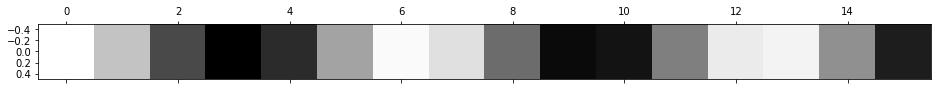

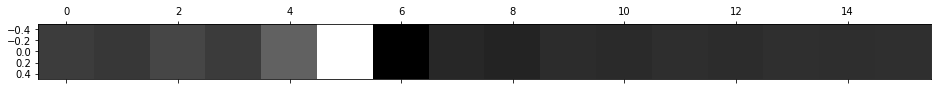

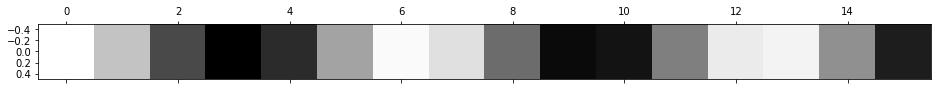

In [7]:
import math

import torch
import matplotlib.pyplot as plt


def dct_matrix(n):
    ret = torch.Tensor(n, n)
    
    for k in range(n):
        for i in range(n):
            ret[k, i] = math.pi / n * (i + .5) * k
            
    ret = torch.cos(ret)  
    ret[0] /= math.sqrt(2) # X_0 /= sqrt(2)
    return ret * math.sqrt(2 / n)


def idct_matrix(n):
    ret = torch.Tensor(n, n)
    
    for k in range(n):
        for i in range(n):
            ret[k, i] = math.pi / n * i * (k + .5)
            
    ret = torch.cos(ret)
    ret[:, 0] /= math.sqrt(2) # x_0 /= sqrt(2)
    return ret * math.sqrt(2 / n)
    
N = 16

dct_mat = dct_matrix(N)
idct_mat = idct_matrix(N)

t = torch.cos(torch.arange(N))
print(t)
plt.matshow(t.unsqueeze(0).numpy(), cmap='gray')

s = torch.matmul(dct_mat, t)
print(s)
plt.matshow(s.unsqueeze(0).numpy(), cmap='gray')

t_ = torch.matmul(idct_mat, s)
print(t_)
plt.matshow(t_.unsqueeze(0).numpy(), cmap='gray')

plt.show()